<a href="https://colab.research.google.com/github/dhanushpachabhatla/my-machine-learning-notes/blob/main/random_forest_using_dt_bagging.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [8]:
import numpy as np
import pandas as pd
import random
from sklearn.datasets import make_classification

In [9]:
X,y = make_classification(n_features=5, n_redundant=0, n_informative=5,n_clusters_per_class=1)


In [10]:
df = pd.DataFrame(X,columns=['col1','col2','col3','col4','col5'])
df['target'] = y
print(df.shape)
df.head()

(100, 6)


,col1,col2,col3,col4,col5,target
0,0.419479,-2.431349,-2.296631,0.976048,0.991642,1
1,2.162954,-0.783194,0.060380,1.981690,1.786198,1
2,1.585936,0.492146,-1.993069,1.428688,2.695290,0
3,2.915801,0.635972,-0.243053,1.662943,-0.519893,1
4,3.107696,-1.764821,-0.763925,2.137010,-1.269800,1


In [11]:
# function for row sampling

def sample_rows(df,percent):
  return df.sample(int(percent*df.shape[0]),replace=True)

In [12]:
# function for feature sampling
def sample_features(df,percent):
  cols = random.sample(df.columns.tolist()[:-1],int(percent*(df.shape[1]-1)))
  new_df = df[cols]
  new_df['target'] = df['target']
  return new_df

In [13]:
# function for combined sampling

def combined_sampling(df,row_percent,col_percent):
  new_df = sample_rows(df,row_percent)
  return sample_features(new_df,col_percent)

In [14]:
df1 = combined_sampling(df,0.5,0.5)

<ipython-input-12-12db9cc58a3b>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['target'] = df['target']


In [15]:
df2 = combined_sampling(df,0.5,0.5)

<ipython-input-12-12db9cc58a3b>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['target'] = df['target']


In [16]:
df3 = combined_sampling(df,0.5,0.5)

<ipython-input-12-12db9cc58a3b>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['target'] = df['target']


In [17]:
print(df1.columns)
print(df2.columns)
print(df3.columns)

Index(['col3', 'col1', 'target'], dtype='object')
Index(['col5', 'col1', 'target'], dtype='object')
Index(['col5', 'col2', 'target'], dtype='object')


In [18]:
df3.head()

,col5,col2,target
25,1.581109,-1.026820,1
74,-1.037334,0.911827,0
9,3.293703,0.006278,0
19,-1.018275,-0.996584,1
46,-0.044863,-3.410434,1


In [19]:
from sklearn.tree import DecisionTreeClassifier
clf1 = DecisionTreeClassifier()
clf2 = DecisionTreeClassifier()
clf3 = DecisionTreeClassifier()


clf1.fit(df1.iloc[:,0:2],df1.iloc[:,-1])
clf2.fit(df2.iloc[:,0:2],df2.iloc[:,-1])
clf3.fit(df3.iloc[:,0:2],df3.iloc[:,-1])

DecisionTreeClassifier()

In [20]:
from sklearn.tree import plot_tree

[Text(0.4666666666666667, 0.95, 'x[1] <= 3.228\ngini = 0.487\nsamples = 50\nvalue = [21.0, 29.0]'),
 Text(0.4, 0.85, 'x[0] <= 1.077\ngini = 0.5\nsamples = 41\nvalue = [21, 20]'),
 Text(0.43333333333333335, 0.8999999999999999, 'True  '),
 Text(0.3333333333333333, 0.75, 'x[0] <= -2.451\ngini = 0.497\nsamples = 37\nvalue = [17, 20]'),
 Text(0.13333333333333333, 0.65, 'x[0] <= -3.573\ngini = 0.278\nsamples = 6\nvalue = [5, 1]'),
 Text(0.06666666666666667, 0.55, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.2, 0.55, 'gini = 0.0\nsamples = 5\nvalue = [5, 0]'),
 Text(0.5333333333333333, 0.65, 'x[0] <= -1.456\ngini = 0.475\nsamples = 31\nvalue = [12, 19]'),
 Text(0.3333333333333333, 0.55, 'x[1] <= 1.913\ngini = 0.165\nsamples = 11\nvalue = [1, 10]'),
 Text(0.26666666666666666, 0.45, 'gini = 0.0\nsamples = 7\nvalue = [0, 7]'),
 Text(0.4, 0.45, 'x[1] <= 2.387\ngini = 0.375\nsamples = 4\nvalue = [1, 3]'),
 Text(0.3333333333333333, 0.35, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.46

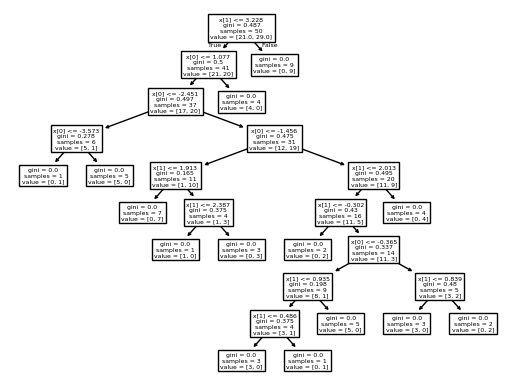

In [21]:
plot_tree(clf1)

[Text(0.4444444444444444, 0.9545454545454546, 'x[1] <= 2.387\ngini = 0.487\nsamples = 50\nvalue = [21.0, 29.0]'),
 Text(0.3333333333333333, 0.8636363636363636, 'x[0] <= -0.029\ngini = 0.499\nsamples = 40\nvalue = [21, 19]'),
 Text(0.38888888888888884, 0.9090909090909092, 'True  '),
 Text(0.2222222222222222, 0.7727272727272727, 'gini = 0.0\nsamples = 5\nvalue = [5, 0]'),
 Text(0.4444444444444444, 0.7727272727272727, 'x[0] <= 0.454\ngini = 0.496\nsamples = 35\nvalue = [16, 19]'),
 Text(0.3333333333333333, 0.6818181818181818, 'gini = 0.0\nsamples = 6\nvalue = [0, 6]'),
 Text(0.5555555555555556, 0.6818181818181818, 'x[1] <= 1.534\ngini = 0.495\nsamples = 29\nvalue = [16, 13]'),
 Text(0.4444444444444444, 0.5909090909090909, 'x[0] <= 0.733\ngini = 0.491\nsamples = 23\nvalue = [10.0, 13.0]'),
 Text(0.2222222222222222, 0.5, 'x[1] <= 0.779\ngini = 0.278\nsamples = 6\nvalue = [5, 1]'),
 Text(0.1111111111111111, 0.4090909090909091, 'gini = 0.0\nsamples = 5\nvalue = [5, 0]'),
 Text(0.3333333333333

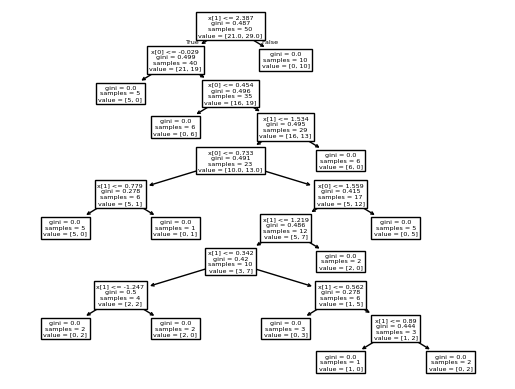

In [22]:
plot_tree(clf2)

[Text(0.5555555555555556, 0.9, 'x[1] <= 0.091\ngini = 0.497\nsamples = 50\nvalue = [27, 23]'),
 Text(0.3333333333333333, 0.7, 'x[0] <= 3.226\ngini = 0.269\nsamples = 25\nvalue = [4, 21]'),
 Text(0.4444444444444444, 0.8, 'True  '),
 Text(0.2222222222222222, 0.5, 'x[1] <= -0.61\ngini = 0.087\nsamples = 22\nvalue = [1, 21]'),
 Text(0.1111111111111111, 0.3, 'gini = 0.0\nsamples = 15\nvalue = [0, 15]'),
 Text(0.3333333333333333, 0.3, 'x[1] <= -0.485\ngini = 0.245\nsamples = 7\nvalue = [1, 6]'),
 Text(0.2222222222222222, 0.1, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.4444444444444444, 0.1, 'gini = 0.0\nsamples = 6\nvalue = [0, 6]'),
 Text(0.4444444444444444, 0.5, 'gini = 0.0\nsamples = 3\nvalue = [3, 0]'),
 Text(0.7777777777777778, 0.7, 'x[1] <= 0.648\ngini = 0.147\nsamples = 25\nvalue = [23, 2]'),
 Text(0.6666666666666667, 0.8, '  False'),
 Text(0.6666666666666666, 0.5, 'x[0] <= 0.093\ngini = 0.444\nsamples = 6\nvalue = [4, 2]'),
 Text(0.5555555555555556, 0.3, 'gini = 0.0\nsamples

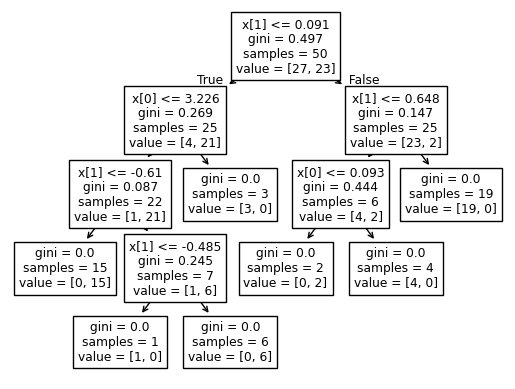

In [23]:
plot_tree(clf3)

In [24]:
clf1.predict(np.array([-1.042498,	-0.064323]).reshape(1,2))

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([0])

In [25]:
clf2.predict(np.array([-1.042498,	-0.064323]).reshape(1,2))

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([0])

In [26]:
clf3.predict(np.array([-1.042498,	-0.064323]).reshape(1,2))

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([1])